# Exploring Circumcenters

In [1]:
using Distributions, StatsPlots, Plots, StatsBase, LinearAlgebra
using ProximalOperators;

┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/ProximalOperators/ez37h.ji for ProximalOperators [a725b495-10eb-56fe-b38b-717eba820537]
└ @ Base loading.jl:1190


In [9]:
r1,r2 = 2.0,2.0
f = IndBallL2(r1)
h = IndBallL2(r2)

x = [2.0, 5.0]
b = [2.0, 0.0]
c = [4.8, 0.0]
f = Translate(f, -b)
h = Translate(h, -c)

pf, fy = prox(f, x, 1.0)
ph, fy = prox(h, x, 1.0)
xₜ(t) = r1*cos(t)+b[1]
yₜ(t) = r1*sin(t)
zₜ(t) = r2*sin(t)
wₜ(t) = r2*cos(t)+c[1]

wₜ (generic function with 1 method)

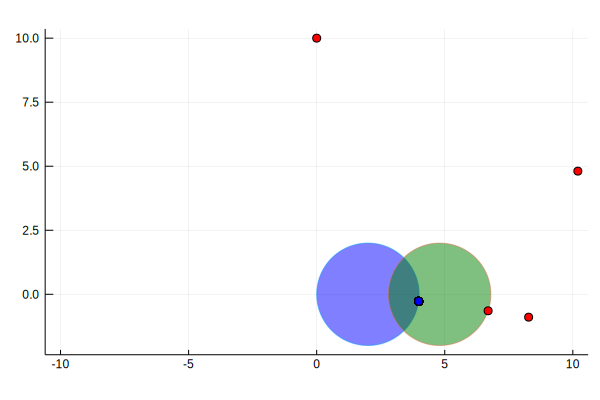

In [187]:
function CC(S)
    T1 = (S.-S[:,1])[:,2:end]
    T2 = pinv(T1' * T1) # MODIFIED THE ORIGINAL BY THE PSEUDO-INVERSE INSTEAD OF THE INVERSE. IT SEEMS TO WORK... WHY?
    T3 = diag((S.-S[:,1])[:,2:end]' * (S.-S[:,1])[:,2:end])
    cc = S[:,1] + 0.5.*T1 * T2 * T3
    return cc
end

n  = 100# Number of iterations
zk = zeros(n,2);
zo = [0.0,10.0] # Initial point of iteration
zk[1,:] = zo
Ra     = 2*prox(h, zk[1,:], 1.0)[1] - zk[1,:]
Rb_Ra  = 2*prox(f, Ra, 1.0)[1] - Ra
ccz    = CC([zk[1,:] Ra Rb_Ra])
rc = norm(ccz - zk[1,:])

for i = 1:n-1
    Ra     = 2*prox(h, zk[i,:], 1.0)[1] - zk[i,:]
    Rb_Ra  = 2*prox(f, Ra, 1.0)[1] - Ra
    zk[i+1,:]= CC([zk[i,:] Ra Rb_Ra])
end
plot(xₜ, yₜ, 0, 2π, leg=false, fill=(0,:blue), alpha=0.5,aspect_ratio =1,label="A")
plot!(wₜ, zₜ, 0, 2π, leg=false, fill=(0,:green), alpha=0.5,aspect_ratio =1,label="B")
plot!(zk[:,1],zk[:,2],marker=:circle,c=:red)
plot!(zk[end-1:end,1],zk[end-1:end,2],marker=:circle,c=:orange)
plot!([Ra[1]],[Ra[2]],marker=:circle,c=:green)
plot!([Rb_Ra[1]],[Rb_Ra[2]],marker=:circle,c=:blue,xlims=[-10,10],ylims=[-2,10])

In [219]:
function CRM(f,h;initial_point=[0.0,0.0], max_steps = 1000, tol = 10^-5)
    n  = max_steps
    zk = zeros(n,2);
    zk[1,:] = initial_point
    
    Ra     = 2*prox(h, zk[1,:], 1.0)[1] - zk[1,:]
    Rb_Ra  = 2*prox(f, Ra, 1.0)[1] - Ra
    ccz    = CC([zk[1,:] Ra Rb_Ra])
    rc = norm(ccz - zk[1,:])

    for i = 1:n-1
        Ra     = 2*prox(h, zk[i,:], 1.0)[1] - zk[i,:]
        Rb_Ra  = 2*prox(f, Ra, 1.0)[1] - Ra
        zk[i+1,:]= CC([zk[i,:] Ra Rb_Ra])
        if norm(zk[i+1,:] - zk[i,:]) < tol
            return i,zk[i+1,:]
        end
    end
    return Inf
end

CRM(f,h,max_steps = 1000, tol = 10^-5, initial_point=[0.0,10.0])

(21, [3.98141, -0.272072])

In [220]:
xlimite = [-15,15]
ylimite = [0,15]
step    = 0.5
grid = collect(Iterators.product((xlimite[1]:step:xlimite[2]), (ylimite[1]:step:ylimite[2])))[:];
x = xlimite[1]:step:xlimite[2]
y = ylimite[1]:step:ylimite[2]

0.0:0.5:15.0

In [231]:
x,y = CRM(f,h,max_steps = 1000, tol = 10^-5, initial_point=[grid[1][1],grid[1][2]])

(3, [2.8, 0.0])

In [235]:
c_iter  = zeros(size(grid)[1])
p_final = zeros(size(grid)[1],2)
for (k,g) in enumerate(grid)
    c_iter[k],p_final[k,:] = CRM(f,h,max_steps = 1000, tol = 10^-5, initial_point=[g[1],g[2]])
end

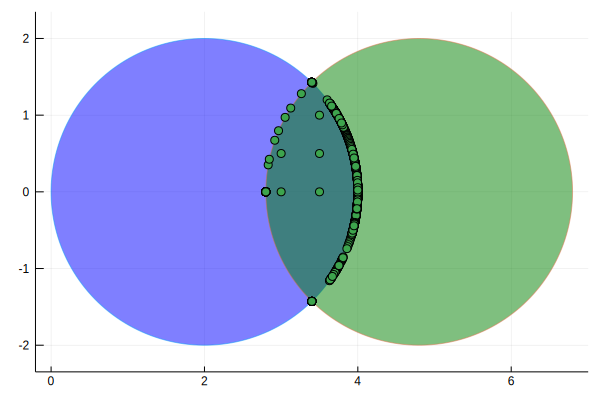

In [243]:
plot(xₜ, yₜ, 0, 2π, leg=false, fill=(0,:blue), alpha=0.5,aspect_ratio =1,label="A")
plot!(wₜ, zₜ, 0, 2π, leg=false, fill=(0,:green), alpha=0.5,aspect_ratio =1,label="B")
scatter!(p_final[:,1],p_final[:,2])

In [245]:
f_CRM(x,y) = log(CRM(f,h,max_steps = 1000, tol = 10^-5, initial_point=[x,y]))
contour(x,y,f_CRM,fill=true)

DimensionMismatch: DimensionMismatch("dimensions must match")